In [47]:
# Import modules
import pandas as pd
import numpy as np
import math
from datetime import datetime, timedelta, date

In [255]:
def get_datetime_from_string(date_string):
  return datetime.strptime(date_string, '%m/%d/%y')

def get_order_period_from_date(date_object):
  return date_object.strftime('%Y-%m')

def get_total_revenue_from_row(row):
  num_days = (row['Plan Cancel'] - row['Plan Start']).days
  revenue = (num_days / 28) * row['Monthly Payment']
  return revenue

def get_months_retention_from_row(row):
  num_days = (row['Plan Cancel'] - row['Plan Start']).days
  return math.ceil(num_days / 28)

def cohort_date_from_string(date_string):
    datetime.strptime(date_string, '%Y-%m').strftime('%B-%Y')



In [50]:
# Load in data set by reading the CSV
my_data = pd.read_csv('MRR Company Data Set.csv')

In [51]:
my_data['Plan Start'] = my_data['Plan Start Date'].apply(get_datetime_from_string)
my_data['Plan Cancel'] = my_data['Plan Cancel Date'].apply(get_datetime_from_string)
my_data['Months Retention'] = my_data.apply(get_months_retention_from_row, axis=1)
my_data['Total Revenue'] = my_data.apply(get_total_revenue_from_row, axis=1)
my_data = my_data[my_data['Total Revenue'] > 0]

In [52]:
groups = my_data.groupby(['Plan Start']).agg({
  'Customer ID': 'count',
  'Total Revenue': 'sum'
  })
groups.reset_index(inplace=True)

In [53]:
groups.head()

,Plan Start,Customer ID,Total Revenue
0,2014-01-02,1,171.849643
1,2014-02-01,1,333.103214
2,2014-03-05,1,383.443571
3,2014-03-07,1,982.904643
4,2014-03-26,1,277.407500


In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
def dualAxis2Lines(timeAxis, y, z, title, axis_1_label, axis_2_label):
    sns.set_style("darkgrid")
    colors =['xkcd:sky blue','green', 'coral']
    fig, ax = plt.subplots()
    fig.set_size_inches(14,8)

    ax.plot(timeAxis,y, color=colors[0], linewidth=4, label=axis_1_label)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
    ax.fill_between(timeAxis.dt.to_pydatetime(), y, color=colors[1], alpha=0.3) #Create an area chart
    ax.set_ylabel(axis_1_label, fontsize=18, color=colors[0])

    ax2 = ax.twinx()
    ax2.plot(timeAxis,z, color=colors[2], linewidth=4, label=axis_2_label)
    ax2.legend(bbox_to_anchor=(1.05, 1.05), loc=2)
    ax2.set_ylabel(axis_2_label, fontsize=18, color=colors[2])

    fig.autofmt_xdate()
    fig.suptitle(title, fontsize=18)
    fig.savefig('pic1.png')

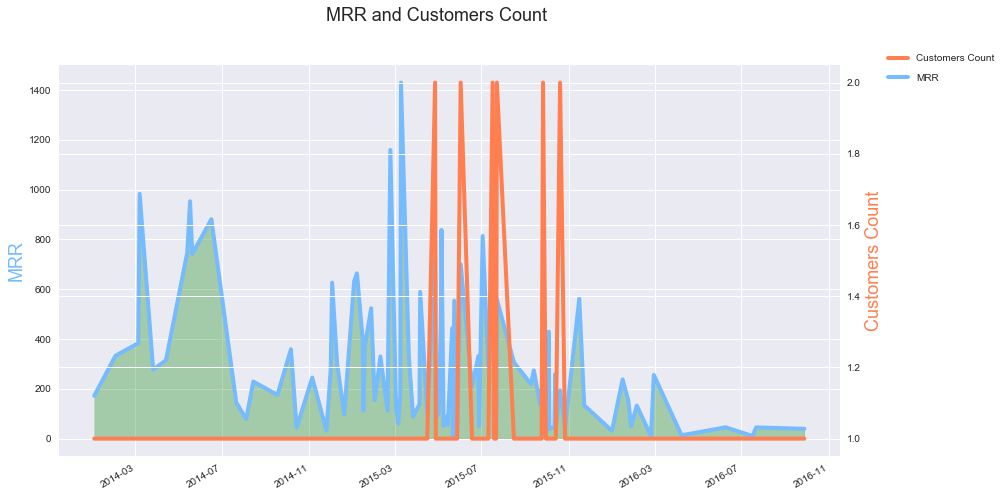

In [56]:
title = 'MRR and Customers Count'
axis_1_label = 'MRR'
axis_2_label = 'Customers Count'
dualAxis2Lines(groups["Plan Start"], groups["Total Revenue"], groups["Customer ID"], title, axis_1_label, axis_2_label)

In [57]:
cohort_df = my_data
cohort_df.set_index('Customer ID', inplace=True)

In [258]:
cohort_df['CohortGroup'] = cohort_df.groupby(level=0)['Plan Start'].min().apply(lambda x: x.strftime('%B-%Y'))


In [259]:
cohort_df.reset_index(inplace=True)

In [260]:
cohort_df

,index,Customer ID,Plan Start Date,Plan Cancel Date,Monthly Payment,Plan Id,Plan Start,Plan Cancel,Months Retention,Total Revenue,CohortGroup
0,0,QWT19CLG2QQ,9/30/15,10/19/15,14.99,1,2015-09-30,2015-10-19,1,10.171786,September-2015
1,1,URL99FXP9VV,8/4/14,12/29/14,14.99,1,2014-08-04,2014-12-29,6,78.697500,August-2014
2,2,EJO15CUP4TO,4/27/15,11/19/15,14.99,1,2015-04-27,2015-11-19,8,110.283571,April-2015
3,3,QQW13PUF3HL,1/2/14,11/19/14,14.99,1,2014-01-02,2014-11-19,12,171.849643,January-2014
4,4,SIJ98IQH0GW,5/15/15,8/26/15,14.99,1,2015-05-15,2015-08-26,4,55.141786,May-2015
5,5,EBH36UPB2XR,6/28/15,10/1/15,14.99,1,2015-06-28,2015-10-01,4,50.858929,June-2015
6,6,BED40SMW5NQ,3/3/15,11/3/15,14.99,1,2015-03-03,2015-11-03,9,131.162500,March-2015
7,7,NYW11ZKC8WK,3/9/15,1/23/16,14.99,1,2015-03-09,2016-01-23,12,171.314286,March-2015
8,8,YLV60ERT0VT,6/9/16,9/2/16,14.99,1,2016-06-09,2016-09-02,4,45.505357,June-2016
9,9,RAV58LEH5XM,5/2/15,11/15/15,14.99,1,2015-05-02,2015-11-15,8,105.465357,May-2015


In [261]:
cohorts = cohort_df.groupby(['CohortGroup', 'Plan Start']).agg({'Customer ID' : pd.Series.nunique, 'Total Revenue': np.sum})

In [262]:
cohorts.rename(columns={'Customer ID': 'TotalCustomers'}, inplace=True)

In [263]:
cohorts.head()

TotalCustomers  Total Revenue
CohortGroup Plan Start                               
April-2014  2014-04-13               1     314.895000
April-2015  2015-04-05               1     138.168214
            2015-04-06               1     589.207143
            2015-04-16               1     100.680714
            2015-04-27               2     720.916429

In [264]:
cohorts = cohorts.reset_index()

In [265]:
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

In [266]:
cohorts = cohorts.groupby(['CohortGroup']).apply(cohort_period)

In [267]:
cohorts.head()

,CohortGroup,Plan Start,TotalCustomers,Total Revenue,CohortPeriod
0,April-2014,2014-04-13,1,314.895000,1
1,April-2015,2015-04-05,1,138.168214,1
2,April-2015,2015-04-06,1,589.207143,2
3,April-2015,2015-04-16,1,100.680714,3
4,April-2015,2015-04-27,2,720.916429,4


In [268]:
cohort_group_size = cohorts.groupby(['CohortGroup'])['TotalCustomers'].first()

In [269]:
# cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

In [270]:
customer_retention = cohorts['TotalCustomers'].unstack(0).divide(cohort_group_size, axis=1)
customer_revenue = cohorts['Total Revenue'].unstack(0)

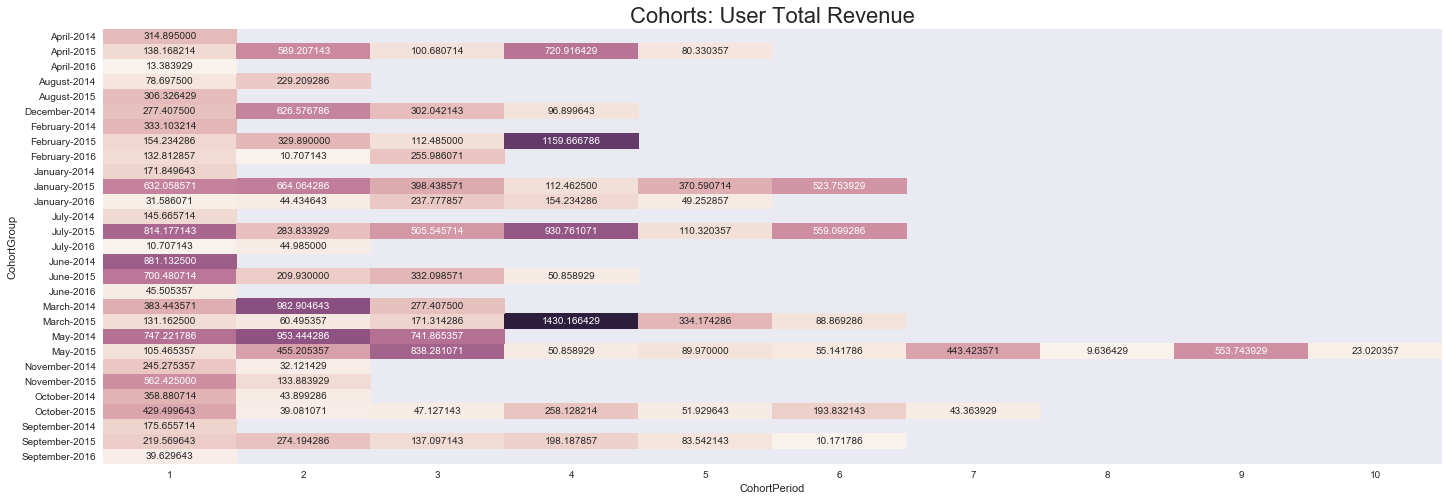

In [271]:
colors = ['red','coral', sns.xkcd_rgb["medium green"],'green']
plt.figure(figsize=(24, 8))
plt.title('Cohorts: User Total Revenue', fontsize=22)
sns.set_style("darkgrid")
sns.heatmap(customer_revenue.T, mask=customer_revenue.T.isnull(),
            annot=True, fmt='f', cbar=False)

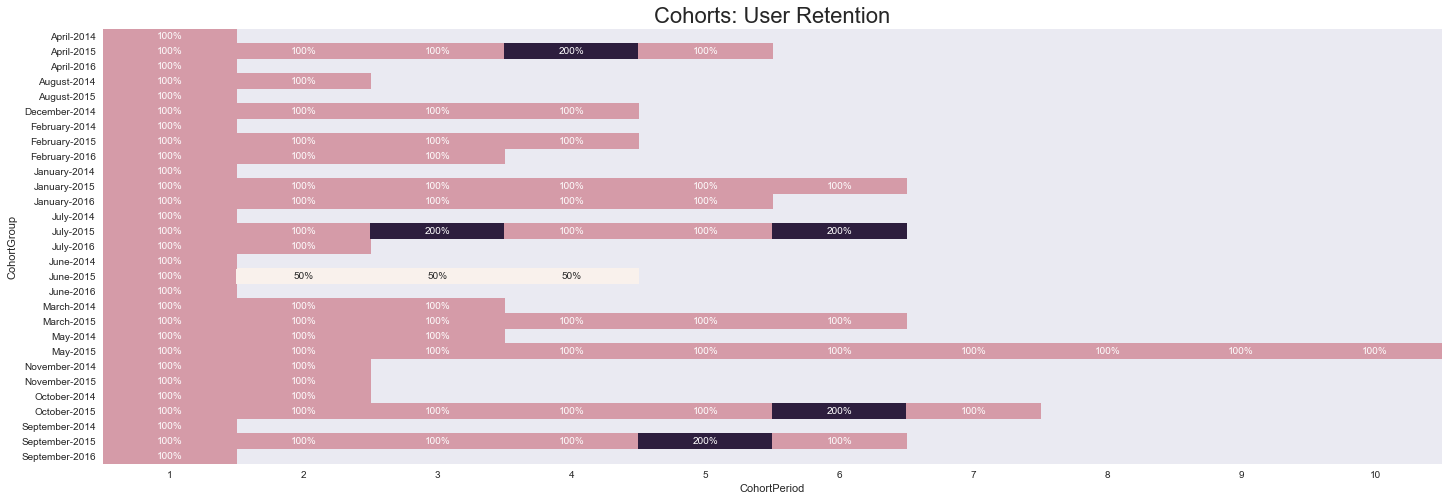

In [272]:
colors = ['red','coral', sns.xkcd_rgb["medium green"],'green']
plt.figure(figsize=(24, 8))
plt.title('Cohorts: User Retention', fontsize=22)
sns.set_style("darkgrid")
sns.heatmap(customer_retention.T, mask=customer_retention.T.isnull(),
            annot=True, fmt='.0%', cbar=False)

In [273]:
cohort_df.head()

,index,Customer ID,Plan Start Date,Plan Cancel Date,Monthly Payment,Plan Id,Plan Start,Plan Cancel,Months Retention,Total Revenue,CohortGroup
0,0,QWT19CLG2QQ,9/30/15,10/19/15,14.99,1,2015-09-30,2015-10-19,1,10.171786,September-2015
1,1,URL99FXP9VV,8/4/14,12/29/14,14.99,1,2014-08-04,2014-12-29,6,78.697500,August-2014
2,2,EJO15CUP4TO,4/27/15,11/19/15,14.99,1,2015-04-27,2015-11-19,8,110.283571,April-2015
3,3,QQW13PUF3HL,1/2/14,11/19/14,14.99,1,2014-01-02,2014-11-19,12,171.849643,January-2014
4,4,SIJ98IQH0GW,5/15/15,8/26/15,14.99,1,2015-05-15,2015-08-26,4,55.141786,May-2015


In [274]:
cohorts = cohort_df.groupby(['CohortGroup'])
cohorts.head()
cohorts['CohortGroup'].unique().size

29

In [275]:
cohort_df['CohortGroup'].unique().sort()

In [276]:
# np.zeros()
cohort_revenue = []
monthly_periods = math.ceil((cohort_df['Plan Start'].max() - cohort_df['Plan Start'].min()).days/28)
for i in range(monthly_periods):
    retention = np.zeros(monthly_periods)
    retention[i:monthly_periods] = 1
    revenue_cohorts.append(retention)
revenue_cohorts
monthly_periods

36

In [281]:
revenues = []
start = 0
for name, group in cohorts:
    cohort = np.zeros(36)
    for index, row in group.iterrows():
        customer_revenue = np.zeros(monthly_periods)
        customer_revenue[start:start+row['Months Retention']] = row['Monthly Payment']
        cohort += customer_revenue
    start += 1
    revenues.append(cohort)
print(np.array(revenues).shape)
# customer_revenues = np.array(revenues)
customer_revenues = pd.DataFrame(data=revenues)
group_dates = sorted(cohort_df['CohortGroup'].unique())
customer_revenues['CohortGroup'] = group_dates
customer_revenues.set_index('CohortGroup', inplace=True)
customer_revenues.reset_index()
customer_revenues.head()

(29, 36)


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
CohortGroup,,,,,,,,,,,,,,,,,,,,,
April-2014,29.99,29.99,29.99,29.99,29.99,29.99,29.99,29.99,29.99,29.99,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
April-2015,0.00,254.94,254.94,254.94,224.95,194.96,164.97,164.97,164.97,74.99,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
April-2016,0.00,0.00,14.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
August-2014,0.00,0.00,0.00,44.98,44.98,44.98,44.98,44.98,44.98,29.99,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
August-2015,0.00,0.00,0.00,0.00,29.99,29.99,29.99,29.99,29.99,29.99,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


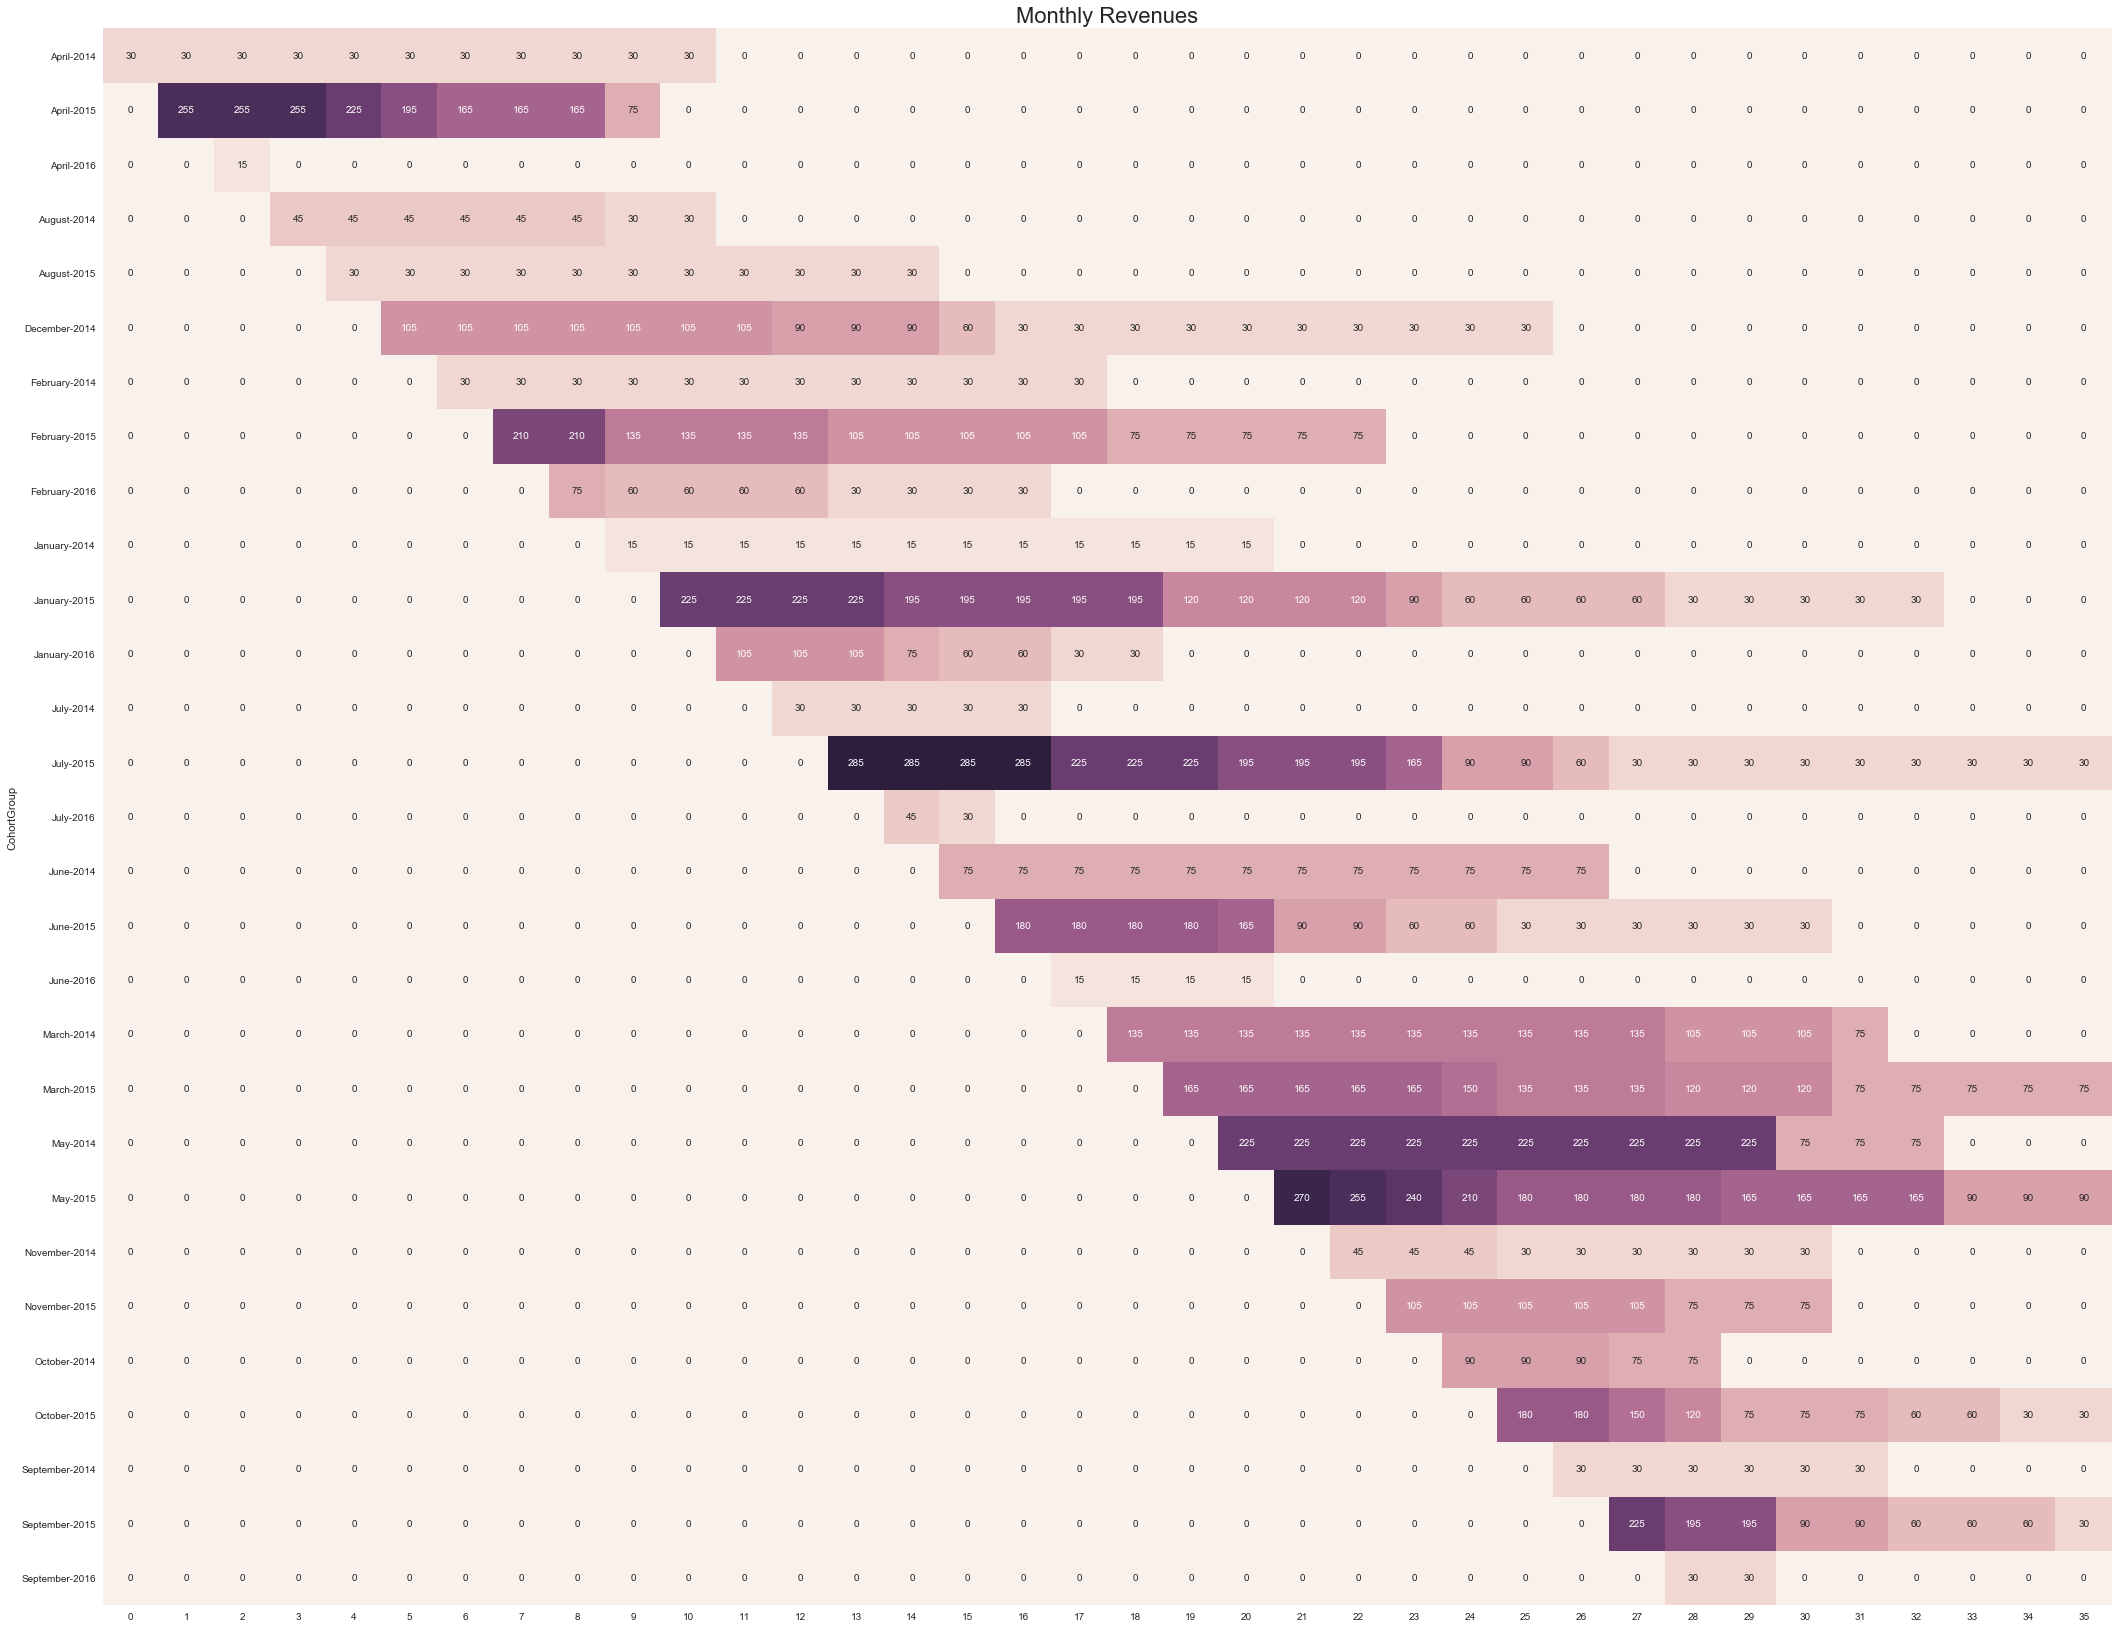

In [286]:
colors = ['red','coral', sns.xkcd_rgb["medium green"],'green']
plt.figure(figsize=(36, 29))
plt.title('Monthly Revenues', fontsize=22)
sns.set_style("darkgrid")
sns.heatmap(customer_revenues, mask=customer_revenues.isnull(),
            annot=True, fmt='.0f', cbar=False)

In [287]:
monthly_revenues = []
max_months_retention = cohort_df['Months Retention'].max()
for name, group in cohorts:
    cohort = np.zeros(max_months_retention)
    for index, row in group.iterrows():
        customer_revenue = np.zeros(max_months_retention)
        customer_revenue[0:row['Months Retention']] = row['Monthly Payment']
        cohort += customer_revenue
    monthly_revenues.append(cohort)
monthly_revenues = pd.DataFrame(data=monthly_revenues)
monthly_revenues['CohortGroup'] = group_dates
monthly_revenues.set_index('CohortGroup', inplace=True)
monthly_revenues.reset_index()
monthly_revenues.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
CohortGroup,,,,,,,,,,,,,,,,,,,,,
April-2014,29.99,29.99,29.99,29.99,29.99,29.99,29.99,29.99,29.99,29.99,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
April-2015,254.94,254.94,254.94,224.95,194.96,164.97,164.97,164.97,74.99,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
April-2016,14.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
August-2014,44.98,44.98,44.98,44.98,44.98,44.98,29.99,29.99,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
August-2015,29.99,29.99,29.99,29.99,29.99,29.99,29.99,29.99,29.99,29.99,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


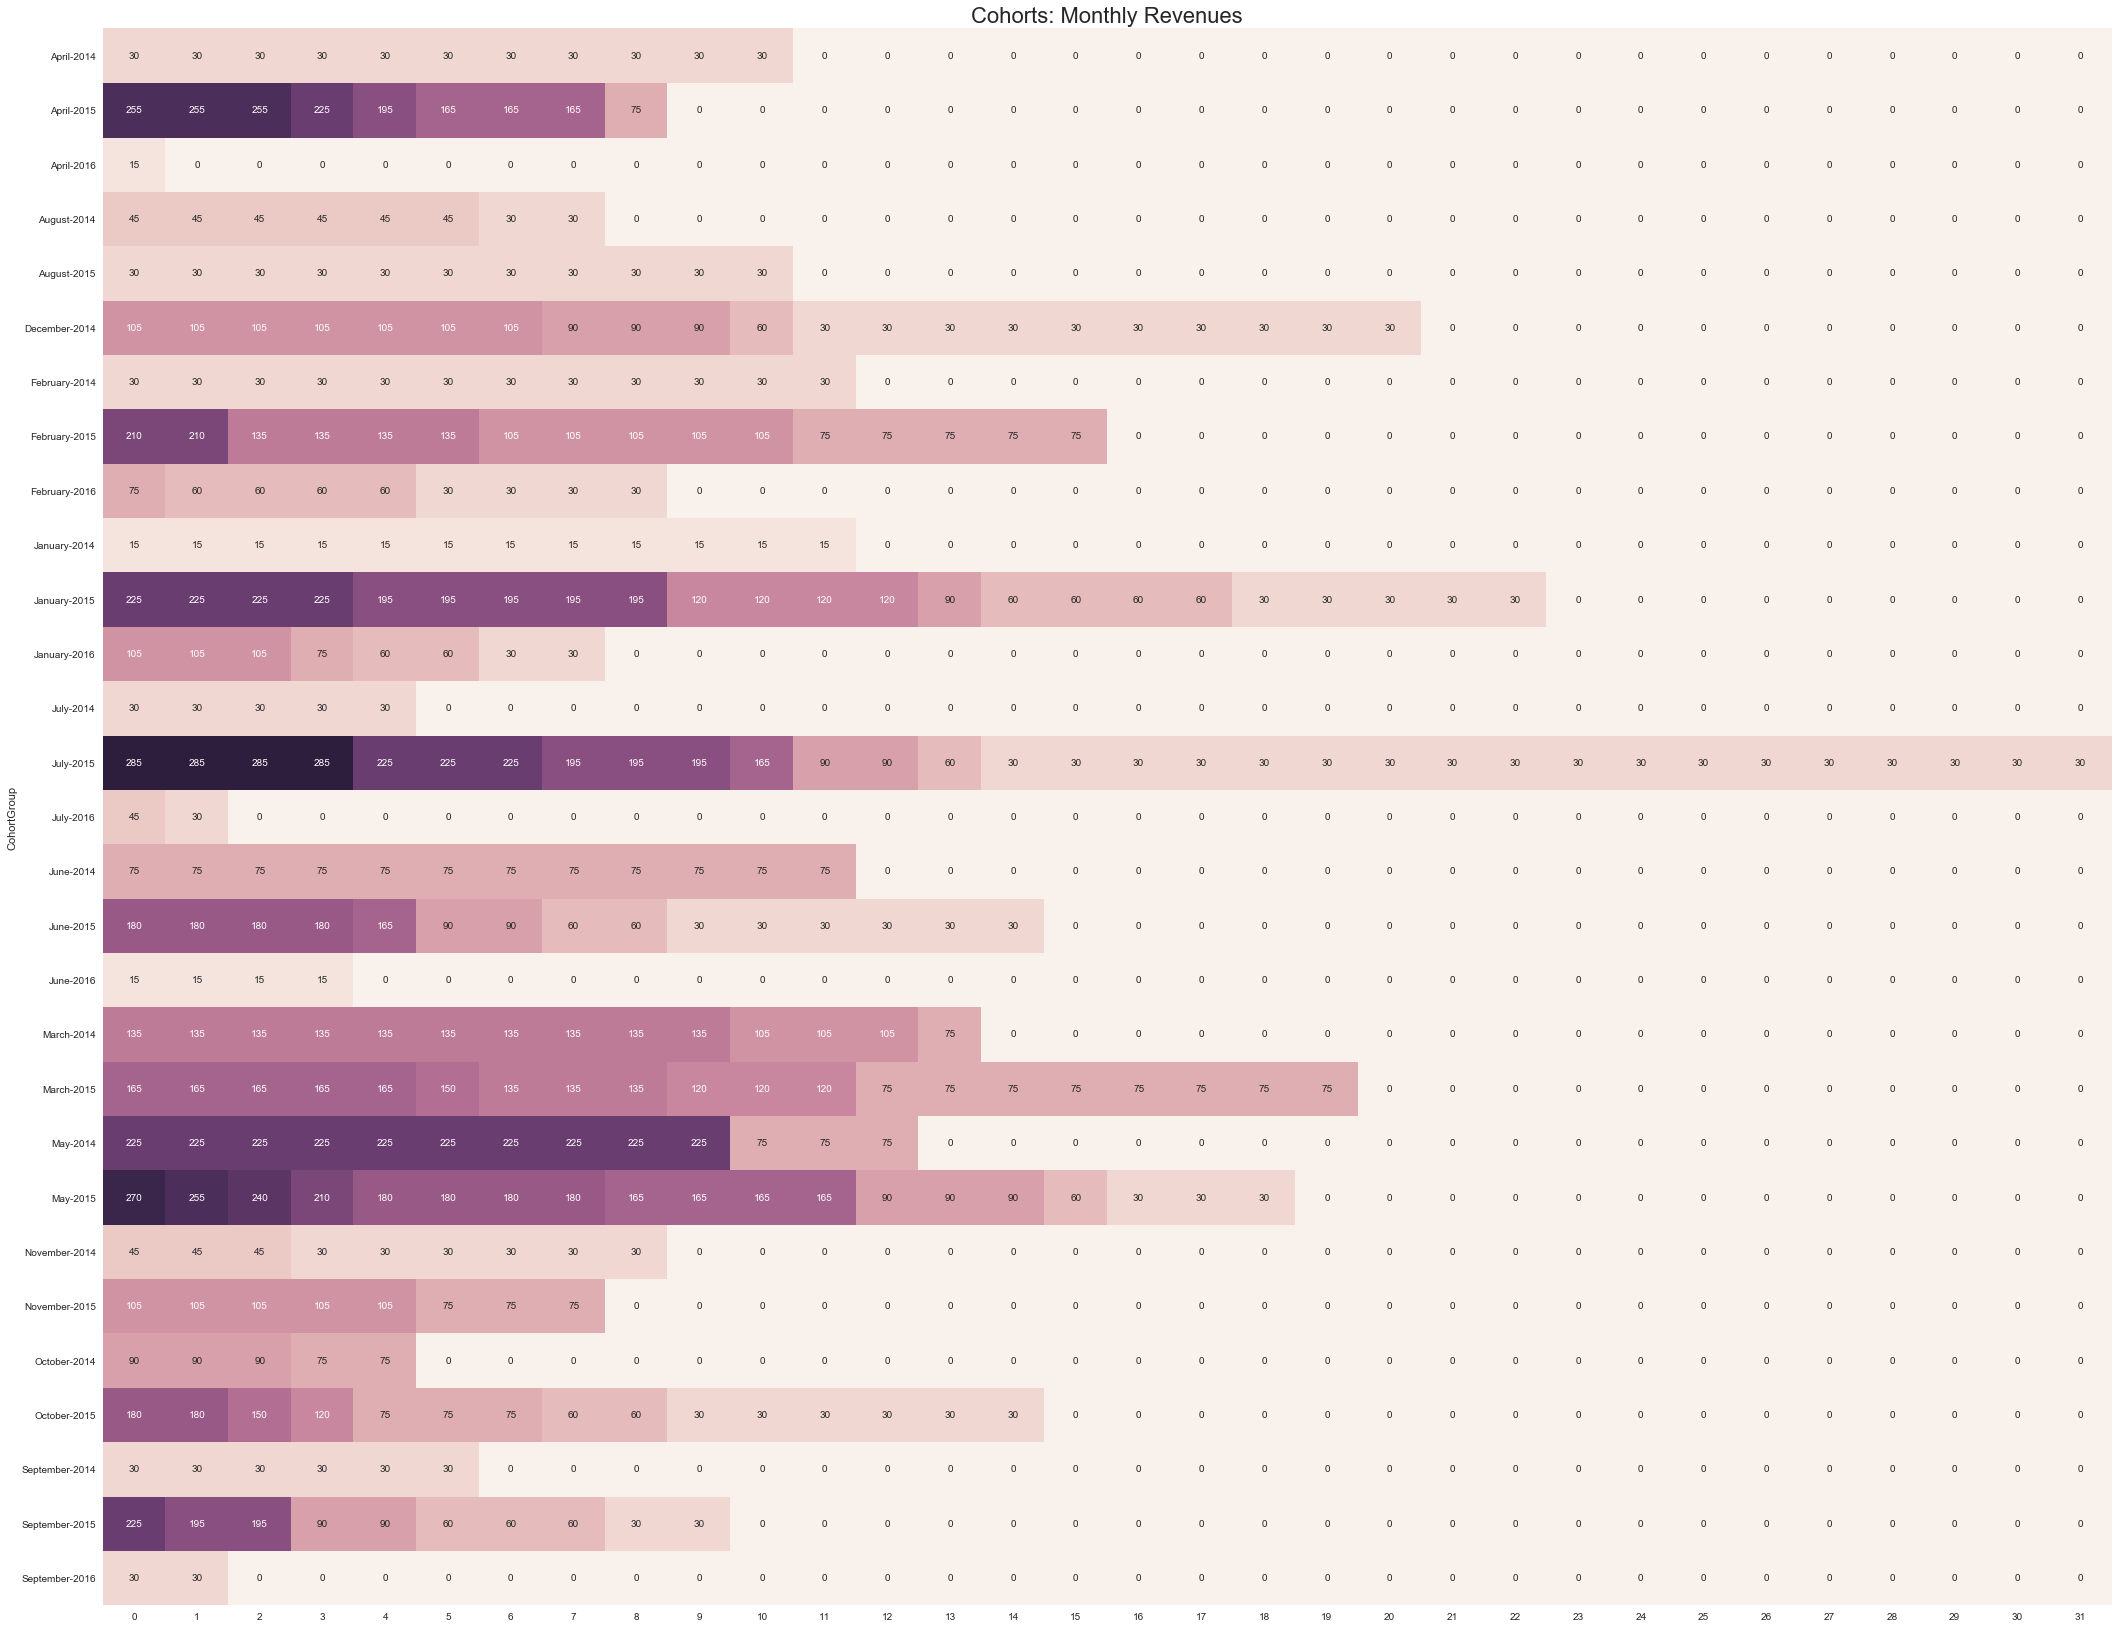

In [288]:
colors = ['red','coral', sns.xkcd_rgb["medium green"],'green']
plt.figure(figsize=(36, 29))
plt.title('Cohorts: Monthly Revenues', fontsize=22)
sns.set_style("darkgrid")
sns.heatmap(monthly_revenues, mask=monthly_revenues.isnull(),
            annot=True, fmt='.0f', cbar=False)